In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyemd
import scipy.stats
import seaborn as sns

import sim.fitting
import sim.importing
import sim.log_similarity
import sim.viz

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
log1, petrinet1 = sim.importing.load_input('sim/testruns/sequential.xes')
log2, petrinet2 = sim.importing.load_input('sim/testruns/sequential_modified.xes')

In [3]:
sim.log_similarity.visual_loglang_emd(log1, log2)

#lang1	#lang2	variant
100.00%	100.00%	('A-complete', 'B-complete', 'C-complete')
loglang emd: 0.0


0.0

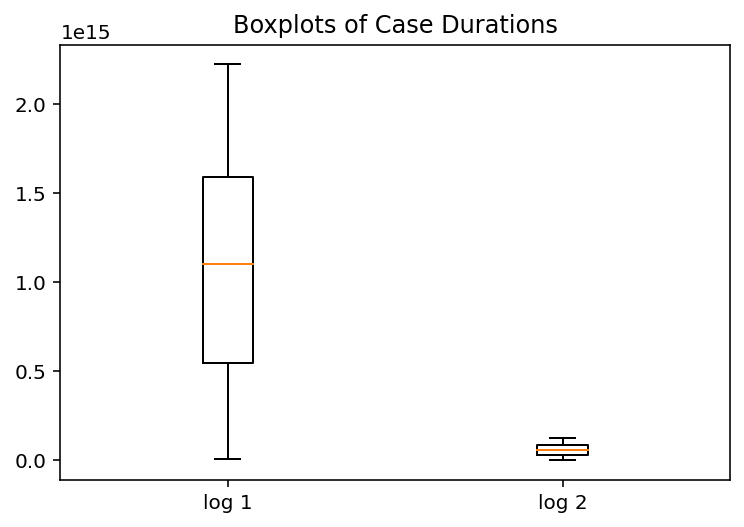

log 1
count                         1000
mean       12 days 15:46:17.880000
std      7 days 05:30:32.576197842
min                0 days 01:58:00
25%                6 days 07:04:00
50%               12 days 17:29:00
75%               18 days 08:46:15
max               25 days 16:36:00
dtype: object
log 2
count                         1000
mean        0 days 15:27:39.780000
std      0 days 09:06:42.859435401
min                0 days 00:11:00
25%                0 days 06:59:00
50%                0 days 14:55:30
75%                0 days 23:28:00
max                1 days 09:41:00
dtype: object
case_duration_emd: 0.46772029201027443


In [4]:
sim.log_similarity.visual_case_duration_emd(log1, log2)

In [5]:
simulation_graph1, replay_data1 = sim.fitting.pre_process_input(log1, petrinet1)
simulation_graph2, replay_data2 = sim.fitting.pre_process_input(log2, petrinet2)

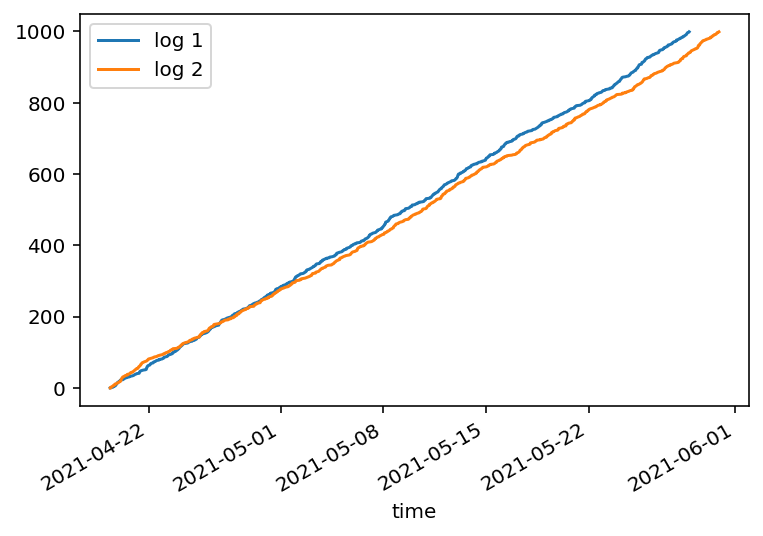

arrivals emd: 0.0242236036277233


In [6]:
sim.log_similarity.visual_arrivals(replay_data1, replay_data2)

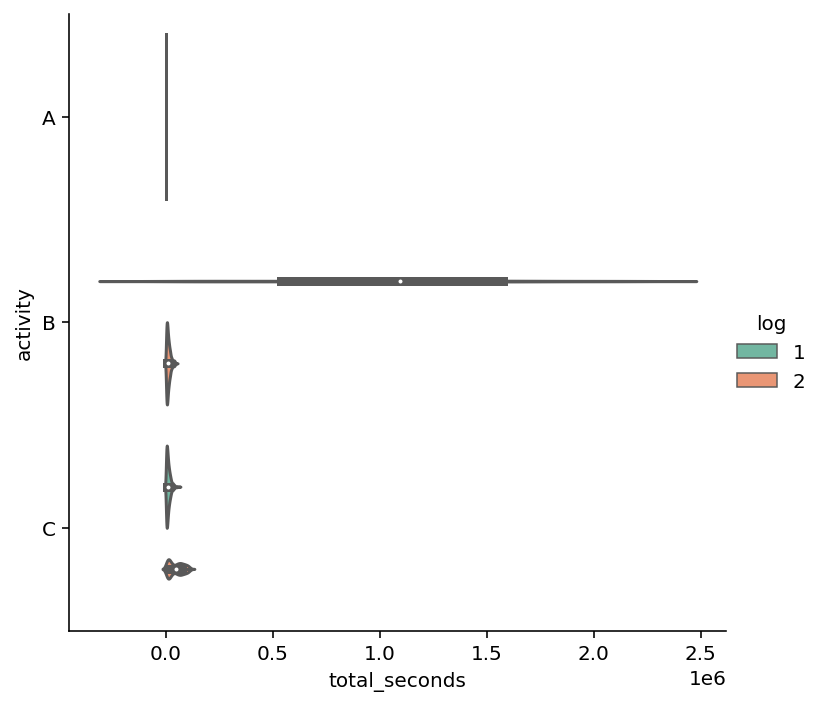

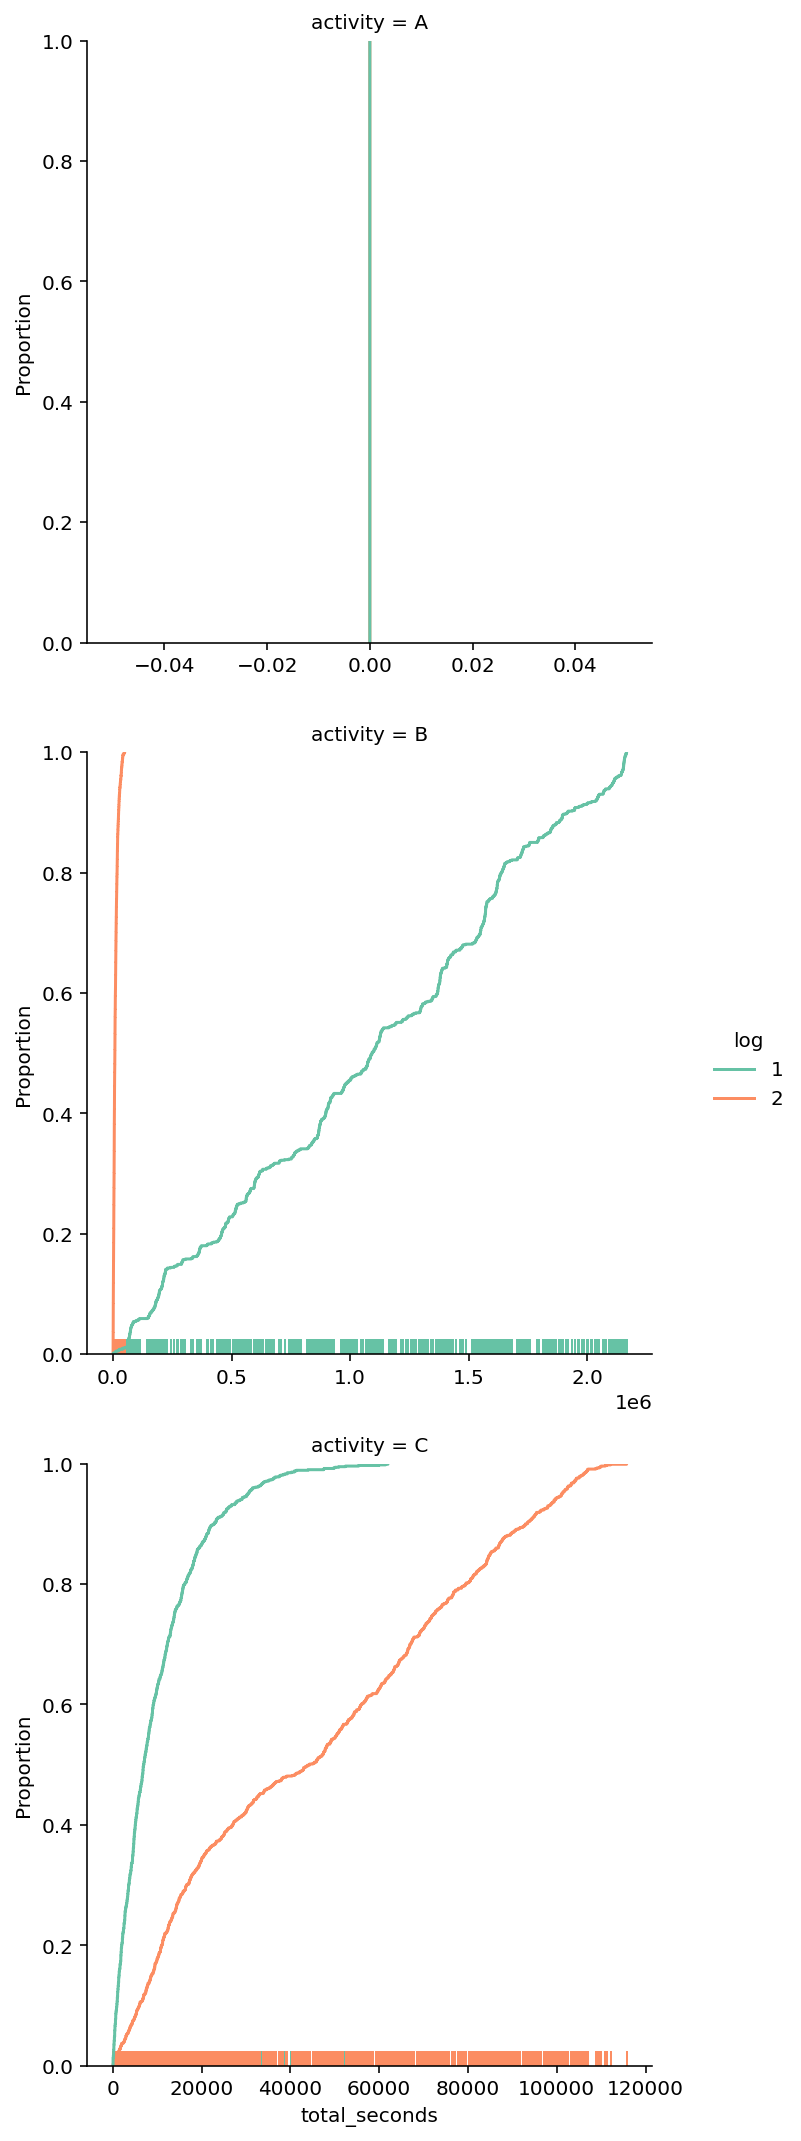

sojourn durations emd of activity A: nan
sojourn durations emd of activity B: 0.4955212886783567
sojourn durations emd of activity C: 0.3055954356846473


In [7]:
sim.log_similarity.visual_sojourn_durations(replay_data1, replay_data2, by='activity')

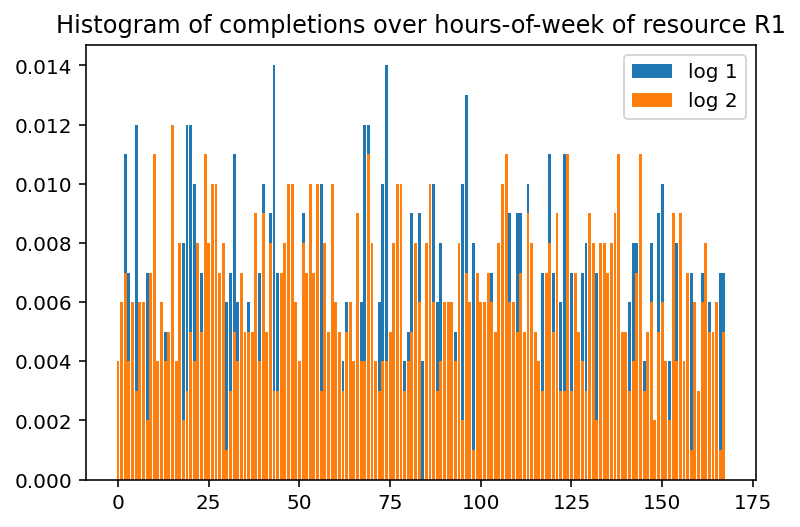

normalized modulo emd for R1: 0.0032813925519999997


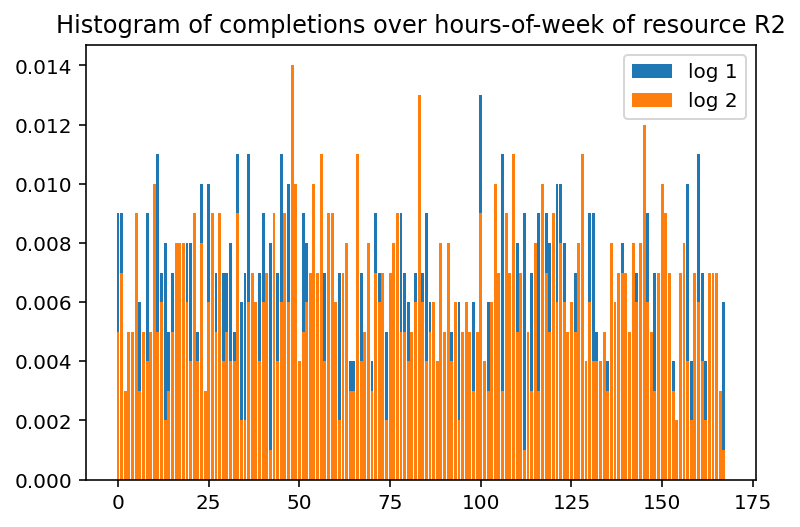

normalized modulo emd for R2: 0.0011844137815807544


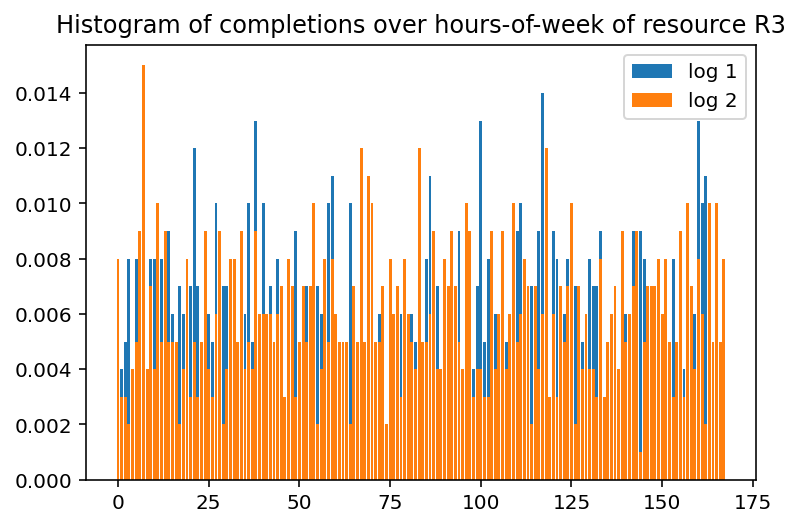

normalized modulo emd for R3: 0.0027472005495571138


In [8]:
sim.log_similarity.visual_completions_bh(replay_data1, replay_data2, by='resource')

In [9]:
df1 = replay_data1.trace_tracker.measurements_df
df2 = replay_data2.trace_tracker.measurements_df

In [10]:
dtype = pd.CategoricalDtype(categories=['original', 'simulated'])
df = pd.concat([df1.assign(log='original'), df2.assign(log='simulated')])
df.log = df.log.astype(dtype, copy=False)

In [11]:
df.head()

case_id activity resource                   enabled  \
0  default_case_0        A       R1 2021-04-19 09:00:00+00:00   
1  default_case_0        B       R2 2021-04-19 09:00:00+00:00   
2  default_case_0        C       R3 2021-04-19 09:30:00+00:00   
3  default_case_1        A       R1 2021-04-19 10:10:00+00:00   
4  default_case_1        B       R2 2021-04-19 10:10:00+00:00   

                  completed           total delay  wait service  \
0 2021-04-19 09:00:00+00:00 0 days 00:00:00  None  None    None   
1 2021-04-19 09:30:00+00:00 0 days 00:30:00  None  None    None   
2 2021-04-19 11:18:00+00:00 0 days 01:48:00  None  None    None   
3 2021-04-19 10:10:00+00:00 0 days 00:00:00  None  None    None   
4 2021-04-19 10:24:00+00:00 0 days 00:14:00  None  None    None   

   total_seconds  concurrent_by_activity  concurrent_by_resource  \
0            0.0                       0                       0   
1         1800.0                       0                       0   
2         6480.0                       1                       1   
3            0.0                       0                       0   
4          840.0                       0                       0   

   concurrent_by_combination       log  
0                          0  original  
1                          0  original  
2                          1  original  
3                          0  original  
4                          0  original

In [12]:
ar_assignment_counts = df.groupby(['activity', 'resource', 'log']).size().unstack()
ar_assignment_times = df.groupby(['activity', 'resource', 'log'])['total'].sum().fillna(pd.Timedelta(0)).unstack()

In [13]:
ar_assignment_counts

log                original  simulated
activity resource                     
A        R1            1000       1000
         R2               0          0
         R3               0          0
B        R1               0          0
         R2            1000       1000
         R3               0          0
C        R1               0          0
         R2               0          0
         R3            1000       1000

In [14]:
ar_assignment_times

log                          original         simulated
activity resource                                      
A        R1           0 days 00:00:00   0 days 00:00:00
         R2           0 days 00:00:00   0 days 00:00:00
         R3           0 days 00:00:00   0 days 00:00:00
B        R1           0 days 00:00:00   0 days 00:00:00
         R2       12541 days 16:53:00 119 days 14:30:00
         R3           0 days 00:00:00   0 days 00:00:00
C        R1           0 days 00:00:00   0 days 00:00:00
         R2           0 days 00:00:00   0 days 00:00:00
         R3         115 days 10:45:00 524 days 14:33:00

In [15]:
span_1 = max(df1['completed']) - min(df1['enabled'])
span_1

Timedelta('65 days 02:45:00')

In [16]:
span_2 = max(df2['completed']) - min(df2['enabled'])
span_2

Timedelta('42 days 04:32:00')

In [17]:
relative_ar_assignment_times = ar_assignment_times / (span_1, span_2)
relative_ar_assignment_times /= (df1['case_id'].nunique(), df2['case_id'].nunique())
#relative_ar_assignment_times /= relative_ar_assignment_times.sum()
relative_ar_assignment_times

log                original  simulated
activity resource                     
A        R1        0.000000   0.000000
         R2        0.000000   0.000000
         R3        0.000000   0.000000
B        R1        0.000000   0.000000
         R2        0.192610   0.002835
         R3        0.000000   0.000000
C        R1        0.000000   0.000000
         R2        0.000000   0.000000
         R3        0.001773   0.012435

In [18]:
relative_ar_assignment_times.sum(axis=0)

log
original     0.194383
simulated    0.015270
dtype: float64

In [19]:
print(scipy.stats.entropy(ar_assignment_counts['original'], ar_assignment_counts['simulated']))
print(scipy.stats.entropy(relative_ar_assignment_times['original'], relative_ar_assignment_times['simulated']))

0.0
1.6184294803135733


In [20]:
def equidistant_matrix(size):
    a = np.ones((size, size))
    np.fill_diagonal(a, 0)
    return a

In [21]:
matrix = equidistant_matrix(len(ar_assignment_counts))
pyemd.emd(relative_ar_assignment_times['original'].to_numpy(copy=True, dtype=np.float),
          relative_ar_assignment_times['simulated'].to_numpy(copy=True, dtype=np.float), matrix)

0.18977477309078875

In [22]:
def quantile_based_processing_duration(log_measurements, p):
    percentile_adapted_total = log_measurements['completed'] - np.max(
        [log_measurements['completed'] - log_measurements['total'].quantile(p), log_measurements['enabled']], axis=0)
    return percentile_adapted_total.groupby([log_measurements.activity, log_measurements.resource]).sum().fillna(
        pd.Timedelta(0))


ass_t1 = df1.groupby(['activity', 'resource'])['total'].sum().fillna(pd.Timedelta(0))
ass_t2 = df2.groupby(['activity', 'resource'])['total'].sum().fillna(pd.Timedelta(0))


def fraction_based_processing_duration(log_measurements, r, prep=None):
    if prep is not None:
        return r * prep
    else:
        return r * log_measurements.groupby(['activity', 'resource'])['total'].sum().fillna(pd.Timedelta(0))

In [23]:
def binary_search(v):
    return v / 2, (1 + v) / 2


def linear_search(step=.1):
    def wrapped(v):
        return max(0, v - step), min(1, v + step)

    return wrapped


def call_pyemd(s1, s2):
    return pyemd.emd(s1.to_numpy(copy=True, dtype=np.float), s2.to_numpy(copy=True, dtype=np.float),
                     equidistant_matrix(len(s1)))


def hypothetical_fraction(r, neigh):
    rl, rh = neigh(r)
    assumed_times = fraction_based_processing_duration(df2, r, ass_t2)
    hypothetical_low_times = fraction_based_processing_duration(df2, rl, ass_t2)
    hypothetical_high_times = fraction_based_processing_duration(df2, rh, ass_t2)
    assumed_original_times = fraction_based_processing_duration(df1, r, ass_t1)
    assumed_times /= assumed_times.sum()
    hypothetical_low_times /= hypothetical_low_times.sum()
    hypothetical_high_times /= hypothetical_high_times.sum()
    assumed_original_times /= assumed_original_times.sum()

    print(call_pyemd(assumed_times, assumed_original_times))
    print(call_pyemd(hypothetical_low_times, assumed_original_times))
    print(call_pyemd(hypothetical_high_times, assumed_original_times))


def hypothetical_quantile(p, neigh):
    pl, ph = neigh(p)
    assumed_times = quantile_based_processing_duration(df2, p)
    hypothetical_low_times = quantile_based_processing_duration(df2, pl)
    hypothetical_high_times = quantile_based_processing_duration(df2, ph)
    assumed_original_times = quantile_based_processing_duration(df1, p)
    assumed_times /= assumed_times.sum()
    hypothetical_low_times /= hypothetical_low_times.sum()
    hypothetical_high_times /= hypothetical_high_times.sum()
    assumed_original_times /= assumed_original_times.sum()
    print(call_pyemd(assumed_times, assumed_original_times))
    print(call_pyemd(hypothetical_low_times, assumed_original_times))
    print(call_pyemd(hypothetical_high_times, assumed_original_times))

In [24]:
hypothetical_fraction(.5, linear_search(.1))
hypothetical_quantile(.5, linear_search(.1))
hypothetical_fraction(.5, binary_search)
hypothetical_quantile(.5, binary_search)

0.805219
0.805219
0.805219


c:\users\daniel\pycharmprojects\pm\venv\lib\site-packages\pandas\core\arrays\datetimelike.py:1342: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


0.127718
0.098995
0.165203
0.805219
0.805219
0.805219
0.127718
nan
0.237365


c:\users\daniel\pycharmprojects\pm\venv\lib\site-packages\pandas\core\arrays\timedeltas.py:496: RuntimeWarning: invalid value encountered in true_divide
  return self._data / other


(array([  1.,   0.,   0.,   3.,   2.,   5.,   5.,  10.,  18.,  28.,  40.,
         46.,  65.,  87.,  89., 121., 107.,  79.,  88.,  57.,  55.,  32.,
         26.,  17.,  11.,   5.,   2.,   1.]),
 array([ 999996.05392468,  999996.3051938 ,  999996.55646291,
         999996.80773203,  999997.05900114,  999997.31027026,
         999997.56153937,  999997.81280849,  999998.0640776 ,
         999998.31534672,  999998.56661583,  999998.81788495,
         999999.06915406,  999999.32042318,  999999.57169229,
         999999.82296141, 1000000.07423052, 1000000.32549963,
        1000000.57676875, 1000000.82803786, 1000001.07930698,
        1000001.33057609, 1000001.58184521, 1000001.83311432,
        1000002.08438344, 1000002.33565255, 1000002.58692167,
        1000002.83819078, 1000003.0894599 ]),
 <BarContainer object of 28 artists>)

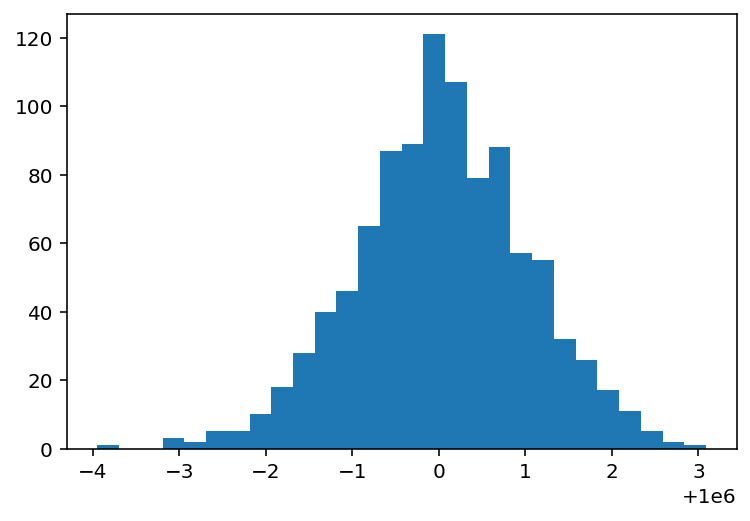

In [45]:
plt.hist(np.random.normal(loc=1e6, size=1000).clip(0), bins='auto')

(array([116., 165., 155., 115.,  79.,  84.,  43.,  33.,  28.,  27.,  19.,
         26.,  18.,  11.,  18.,  10.,   5.,   3.,   2.,   4.,   7.,   2.,
          6.,   2.,   1.,   0.,   0.,   2.,   1.,   0.,   2.,   3.,   0.,
          0.,   1.,   1.,   1.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

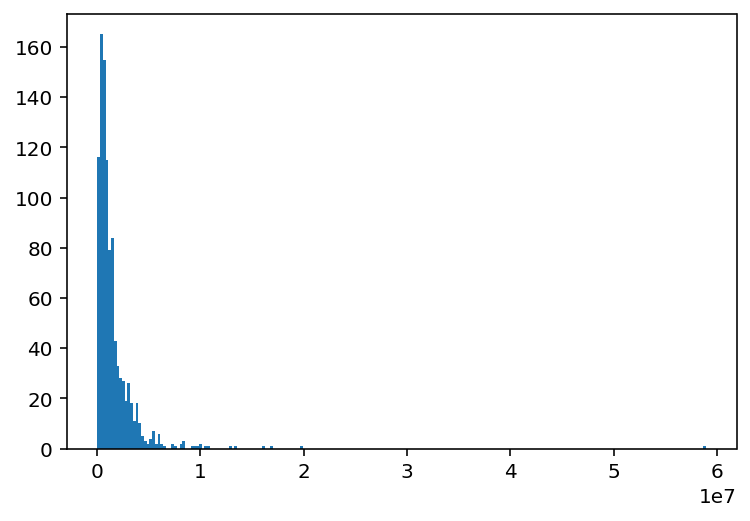

In [32]:
plt.hist(np.random.lognormal(mean=np.log(1e6), size=1000), bins='auto')

(array([195., 133., 122., 103.,  93.,  82.,  47.,  35.,  28.,  24.,  29.,
         20.,  14.,  10.,  11.,  13.,   2.,   5.,  12.,   4.,   3.,   2.,
          5.,   2.,   0.,   2.,   1.,   1.,   0.,   2.]),
 array([2.01241338e+02, 2.01391508e+05, 4.02581775e+05, 6.03772042e+05,
        8.04962309e+05, 1.00615258e+06, 1.20734284e+06, 1.40853311e+06,
        1.60972338e+06, 1.81091364e+06, 2.01210391e+06, 2.21329418e+06,
        2.41448444e+06, 2.61567471e+06, 2.81686498e+06, 3.01805524e+06,
        3.21924551e+06, 3.42043578e+06, 3.62162604e+06, 3.82281631e+06,
        4.02400658e+06, 4.22519685e+06, 4.42638711e+06, 4.62757738e+06,
        4.82876765e+06, 5.02995791e+06, 5.23114818e+06, 5.43233845e+06,
        5.63352871e+06, 5.83471898e+06, 6.03590925e+06]),
 <BarContainer object of 30 artists>)

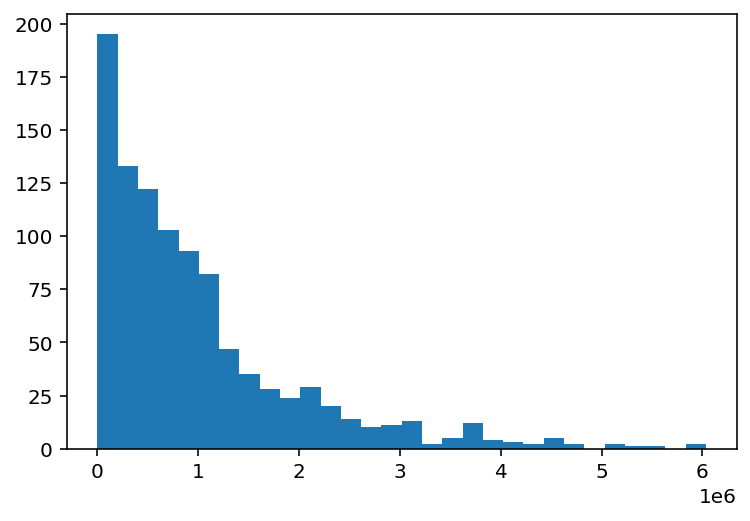

In [30]:
plt.hist(np.random.exponential(scale=1e6, size=1000), bins='auto')

In [46]:
def quantile_guess(series, p):
    return series['total'].quantile(p)


def fractional_guess(totals, r):
    return totals * r

def absolute_clipped_totals(activity_measurements, absolute_guess):
    presumed_start = activity_measurements['completed'] - absolute_guess
    clipped_totals = activity_measurements['completed'] - activity_measurements['enabled'].mask(
        activity_measurements.enabled > presumed_start, presumed_start)
    return clipped_totals.groupby(activity_measurements['resource']).sum().fillna(pd.Timedelta(0))

def absolute_normal_clipped_totals(activity_measurements, absolute_guess):
    normal = np.random.normal(loc=absolute_guess.total_seconds(), size=len(activity_measurements))
    presumed_start = activity_measurements['completed'] - pd.to_timedelta(normal.clip(min=0), unit='seconds')
    clipped_totals = activity_measurements['completed'] - activity_measurements['enabled'].mask(
        activity_measurements.enabled > presumed_start, presumed_start)
    return clipped_totals.groupby(activity_measurements['resource']).sum().fillna(pd.Timedelta(0))

def normalize_total_assignment_durations(original_totals, original_timespan, original_case_count, simulated_totals,
                                         simulated_timespan, simulated_cases, correction_factor=1.0):
    return original_totals / original_timespan / original_case_count, simulated_totals / simulated_timespan / simulated_cases


activities = sorted(set(df.activity))
resources = sorted(set(df.resource))
span_1 = max(df1['completed']) - min(df1['enabled'])
span_2 = max(df2['completed']) - min(df2['enabled'])
cases_1 = df1['case_id'].nunique()
cases_2 = df2['case_id'].nunique()
assignment_totals_1 = df1.groupby(['activity', 'resource'])['total'].sum().fillna(pd.Timedelta(0))
assignment_totals_2 = df2.groupby(['activity', 'resource'])['total'].sum().fillna(pd.Timedelta(0))
value_settings = {'A': .5, 'B': .3, 'C': .6}
type_settings = {'A': 'fraction', 'B': 'fraction', 'C': 'quantile'}
strat = binary_search  #linear_search(.1)
do_normalize = True

neighborhood = {}
for a in activities:
    original_activity_measurements = df1[df1.activity == a]
    simulated_activity_measurements = df2[df2.activity == a]
    original_assignment_totals = assignment_totals_1.xs(a)
    simulated_assignment_totals = assignment_totals_2.xs(a)
    v = value_settings.get(a, .5)
    l, h = strat(v)
    if type_settings.get(a, 'quantile') == 'quantile':
        p = v
        dist_if_lower = absolute_normal_clipped_totals(simulated_activity_measurements,
                                                quantile_guess(simulated_activity_measurements, l))
        dist_currently = absolute_normal_clipped_totals(simulated_activity_measurements,
                                                 quantile_guess(simulated_activity_measurements, p))
        dist_if_higher = absolute_normal_clipped_totals(simulated_activity_measurements,
                                                 quantile_guess(simulated_activity_measurements, h))
        dist_base = absolute_normal_clipped_totals(original_activity_measurements,
                                            quantile_guess(simulated_activity_measurements, p))
    else:
        r = v
        dist_if_lower = fractional_guess(simulated_assignment_totals, l)
        dist_currently = fractional_guess(simulated_assignment_totals, r)
        dist_if_higher = fractional_guess(simulated_assignment_totals, h)
        dist_base = fractional_guess(original_assignment_totals, r)
    if do_normalize:
        args_currently = normalize_total_assignment_durations(dist_base, span_1, cases_1, dist_currently, span_2,
                                                              cases_2)
        args_if_lower = normalize_total_assignment_durations(dist_base, span_1, cases_1, dist_if_lower, span_2,
                                                             cases_2)
        args_if_higher = normalize_total_assignment_durations(dist_base, span_1, cases_1, dist_if_higher, span_2,
                                                              cases_2)
    else:
        args_currently = dist_base, dist_currently
        args_if_lower = dist_base, dist_if_lower
        args_if_higher = dist_base, dist_if_higher
    emd_if_lower = call_pyemd(*args_if_lower)
    emd_currently = call_pyemd(*args_currently)
    emd_if_higher = call_pyemd(*args_if_higher)
    neighborhood[a, l] = emd_currently - emd_if_lower
    neighborhood[a, h] = emd_currently - emd_if_higher

sorted_neighborhood = [(a, v, d) for ((a, v), d) in sorted(neighborhood.items(), key=lambda t: t[1], reverse=True)]
sorted_neighborhood

[('C', 0.3, 0.004937022419203331),
 ('B', 0.65, 0.0009922389386357658),
 ('A', 0.25, 0.0),
 ('A', 0.75, 0.0),
 ('B', 0.15, -0.0004252452594153272),
 ('C', 0.8, -0.004529515356291938)]

In [43]:
sim.log_similarity.activity_resource_assignments_emd(df)

0.0

In [27]:
import sim.simple_parameter_extraction

print(sim.simple_parameter_extraction.resource_business_hours(df1, 'R1'))

AlwaysInBusiness


In [28]:
# a - r assignment frequencies
df1.groupby(['activity', 'resource']).size() / df1.groupby('activity').size()

activity  resource
A         R1          1.0
          R2          0.0
          R3          0.0
B         R1          0.0
          R2          1.0
          R3          0.0
C         R1          0.0
          R2          0.0
          R3          1.0
dtype: float64

In [29]:
# a - r factor of mean total duration (resource skills)
df1.groupby(['activity', 'resource'])['total'].agg(pd.Series.mean) / df1.groupby('activity')['total'].agg(
    pd.Series.mean)

c:\users\daniel\pycharmprojects\pm\venv\lib\site-packages\pandas\core\arrays\timedeltas.py:569: RuntimeWarning: invalid value encountered in true_divide
  return other / self._data


activity  resource
A         R1          NaN
          R2          NaN
          R3          NaN
B         R1          NaN
          R2          1.0
          R3          NaN
C         R1          NaN
          R2          NaN
          R3          1.0
Name: total, dtype: float64

In [30]:
# a - wise total duration percentiles
df1.groupby('activity')['total'].apply(lambda g: g.quantile(np.linspace(0, 1, 11)))

activity     
A         0.0    0 days 00:00:00
          0.1    0 days 00:00:00
          0.2    0 days 00:00:00
          0.3    0 days 00:00:00
          0.4    0 days 00:00:00
          0.5    0 days 00:00:00
          0.6    0 days 00:00:00
          0.7    0 days 00:00:00
          0.8    0 days 00:00:00
          0.9    0 days 00:00:00
          1.0    0 days 00:00:00
B         0.0    0 days 00:13:00
          0.1    1 days 03:44:54
          0.2    3 days 16:45:48
          0.3    6 days 10:32:00
          0.4    8 days 18:36:48
          0.5    9 days 22:54:30
          0.6   12 days 09:58:12
          0.7   15 days 06:04:36
          0.8   17 days 12:52:00
          0.9   20 days 04:12:30
          1.0   22 days 10:14:00
C         0.0    0 days 00:01:00
          0.1    0 days 00:22:00
          0.2    0 days 00:47:48
          0.3    0 days 01:15:42
          0.4    0 days 01:49:00
          0.5    0 days 02:34:00
          0.6    0 days 03:20:24
          0.7    0 days 04:09

In [31]:
q = .5
apply = df1.groupby('activity')['total'].apply(lambda g: (g.quantile(q), g.std()))
print(apply)
df1_a_wise = df1.set_index('activity')
#df1_a_wise['enabled'] +

activity
A              (0 days 00:00:00, 0 days 00:00:00)
B    (9 days 22:54:30, 6 days 16:27:25.241706301)
C    (0 days 02:34:00, 0 days 03:06:45.268938244)
Name: total, dtype: object


In [32]:
# r - wise utilization assuming total duration
df1.groupby('resource')['total'].sum() / (max(df1['completed']) - min(df1['enabled']))

resource
R1      0.000000
R2    172.635587
R3      2.273828
Name: total, dtype: float64

<AxesSubplot:xlabel='enabled,enabled'>

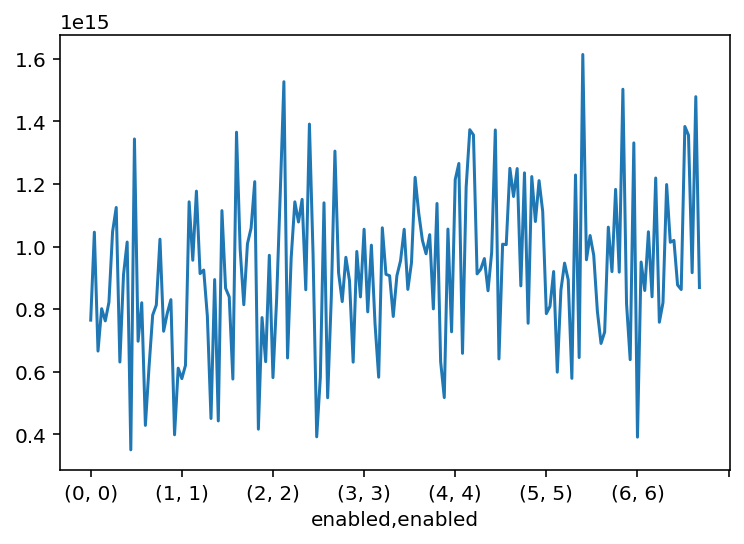

In [59]:
df1[df1.activity == 'B'].groupby([df1.enabled.dt.dayofweek, df1.enabled.dt.hour])['total'].apply(pd.Series.mean).plot()

concurrent_by_activity  total_seconds
concurrent_by_activity                1.000000       0.336645
total_seconds                         0.336645       1.000000

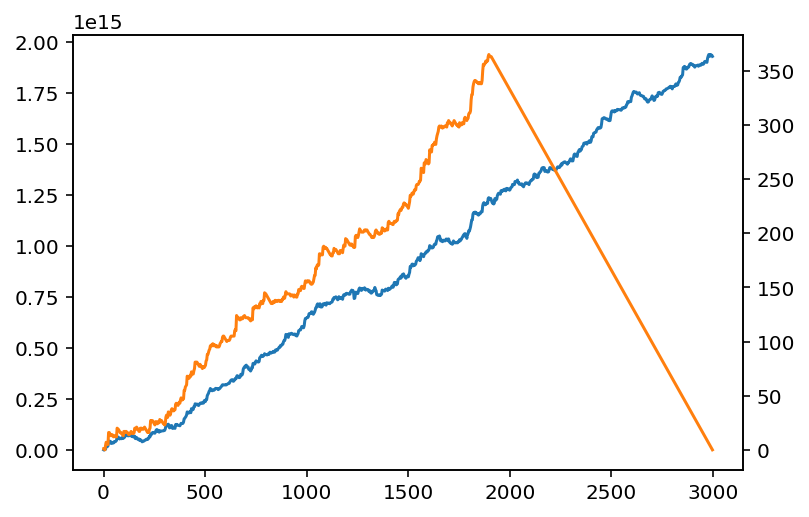

In [68]:
df1[df1.activity == 'B']['total'].plot()
df1[df1.activity == 'B']['concurrent_by_activity'].plot(secondary_y=True)
df1.loc[df1.activity == 'B', ['concurrent_by_activity', 'total_seconds']].corr()

In [33]:
new_df = pd.Series(index=df1.index, dtype='int64')

key = 'activity'
edf = df1.set_index('enabled').assign(change=1, orig=range(len(df1)))
cdf = df1.set_index('completed').assign(change=-1, orig=range(len(df1)))
conc = pd.concat([edf, cdf]).sort_index(kind='mergesort')

A
nan
0  count               1000
   mean     0 days 00:00:00
   std      0 days 00:00:00
   min      0 days 00:00:00
   25%      0 days 00:00:00
   50%      0 days 00:00:00
   75%      0 days 00:00:00
   max      0 days 00:00:00
Name: total, dtype: object


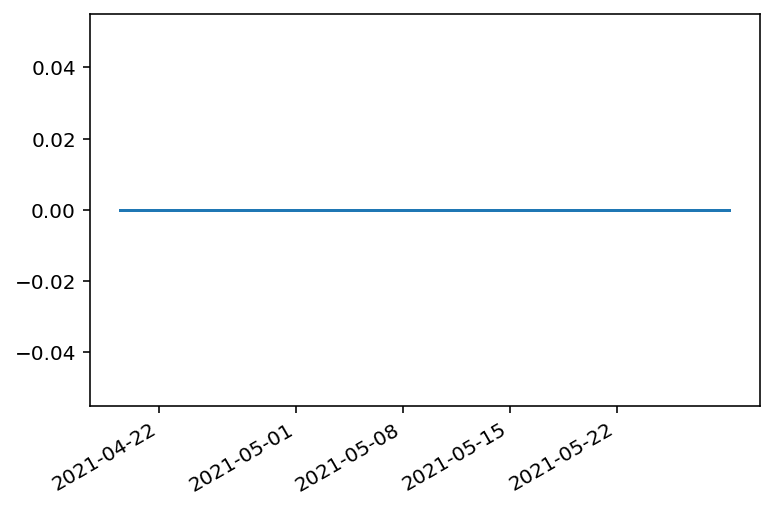

count    1000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: change, dtype: float64
--------------------


B
0.33664510338543063
0    count                             2
     mean               11 days 04:49:00
     std      15 days 17:22:58.400829337
     min                 0 days 01:58:00
     25%                 5 days 15:23:30
                         ...            
365  min                14 days 07:22:00
     25%                14 days 07:22:00
     50%                14 days 07:22:00
     75%                14 days 07:22:00
     max                14 days 07:22:00
Name: total, Length: 2928, dtype: object


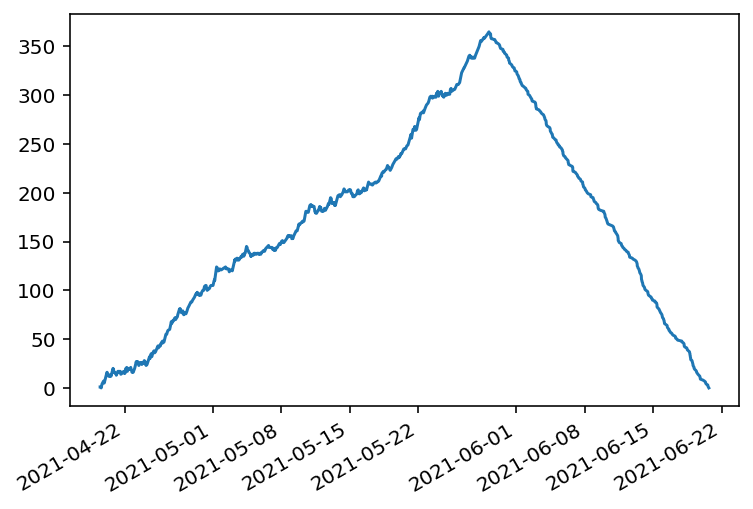

count    1000.00000
mean      164.86300
std       100.93258
min         0.00000
25%        81.75000
50%       156.00000
75%       239.25000
max       365.00000
Name: change, dtype: float64
--------------------


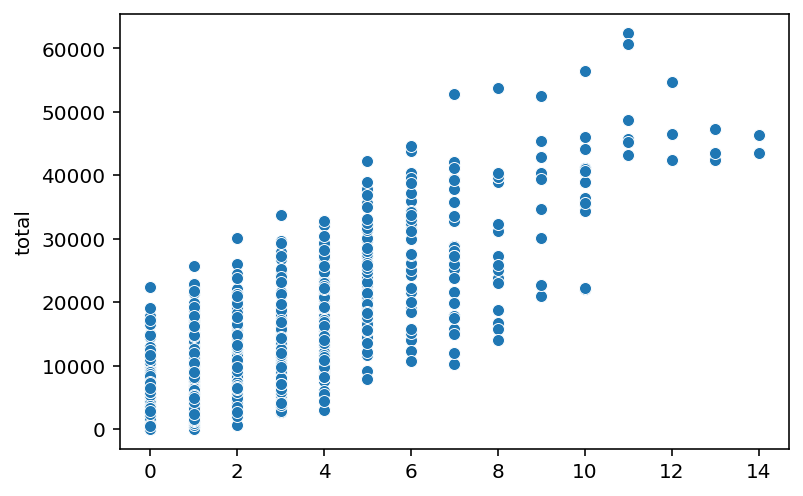

C
0.8282550126216432
0   count                          299
    mean     0 days 01:07:16.856187290
    std      0 days 01:06:38.308302008
    min                0 days 00:01:00
    25%                0 days 00:16:30
                       ...            
14  min                0 days 12:04:00
    25%                0 days 12:16:00
    50%                0 days 12:28:00
    75%                0 days 12:40:00
    max                0 days 12:52:00
Name: total, Length: 120, dtype: object


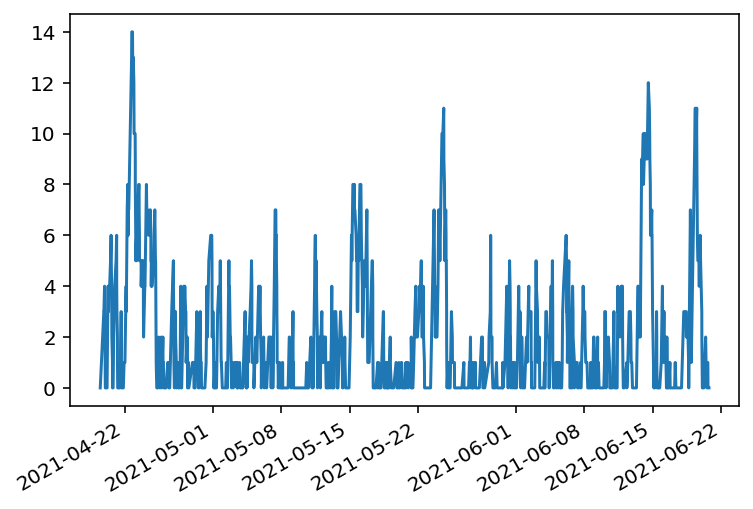

count    1000.000000
mean        2.337000
std         2.623798
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: change, dtype: float64
--------------------


In [36]:
vals = sorted(set(df1[key]))
for val in vals:
    df_val = conc.loc[conc[key] == val]
    concurrent_on_completion = df_val['change'].cumsum().loc[df_val['change'] == -1]
    new_df.loc[df_val.loc[df_val['change'] == -1, 'orig']] = concurrent_on_completion.values
    #sns.stripplot(x=concurrent_on_completion.values, y=df_val.loc[df_val['change'] == -1, 'total'].dt.total_seconds())
    sns.scatterplot(x=concurrent_on_completion.values, y=df_val.loc[df_val['change'] == -1, 'total'].dt.total_seconds())
    plt.show()
    cats = pd.Categorical(concurrent_on_completion)
    res = df_val.loc[df_val['change'] == -1].groupby(cats)['total'].apply(pd.Series.describe)
    print(val)
    print(concurrent_on_completion.corr(df_val.loc[df_val['change'] == -1, 'total'].dt.total_seconds()))
    print(res)
    concurrent_on_completion.plot()
    plt.show()
    print(concurrent_on_completion.describe())
    print('-' * 20)

{('A', 'R1'): 1000, ('B', 'R2'): 1000, ('C', 'R3'): 1000}


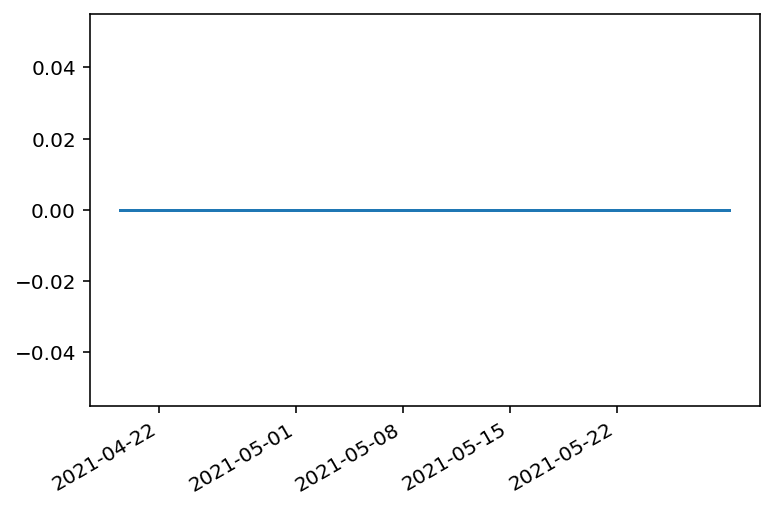

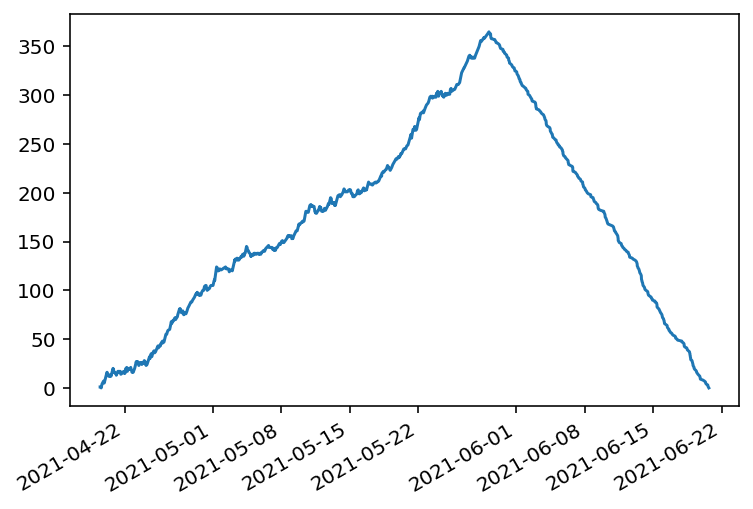

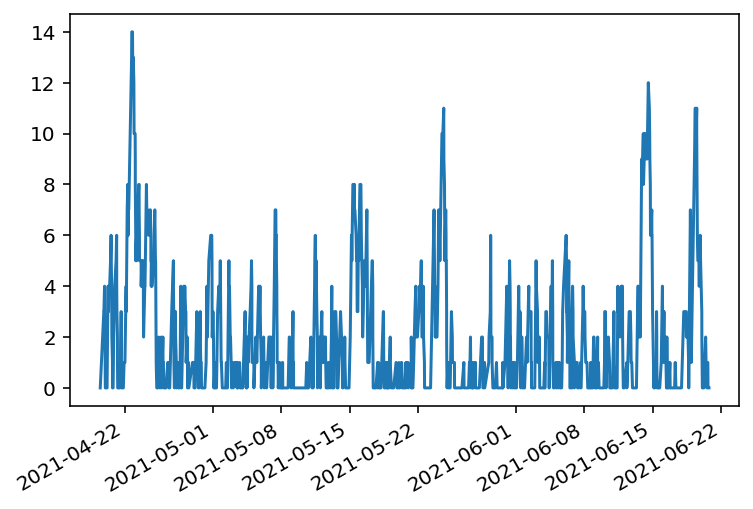

0       0
1       1
2       0
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Length: 3000, dtype: int64

In [38]:
new_col = pd.Series(index=df1.index, dtype='int64')
sizes = df1.groupby(['activity', 'resource']).size()
keys = sizes[sizes > 0].to_dict()
print(keys)
for (a, r) in keys:
    df_a = conc[(conc['activity'] == a) & (conc['resource'] == r)]
    concurrent_on_completion = df_a['change'].cumsum().loc[df_a['change'] == -1]
    new_col.loc[df_a.loc[df_a['change'] == -1, 'orig']] = concurrent_on_completion.values
    concurrent_on_completion.plot()
    plt.show()

new_col

In [39]:
extra = df1.assign(concurrent_on_completion=new_df, total_seconds=df1['total'].dt.total_seconds())
extra

case_id activity resource                   enabled  \
0       default_case_0        A       R1 2021-04-19 11:00:00+02:00   
1       default_case_0        B       R2 2021-04-19 11:00:00+02:00   
2       default_case_0        C       R3 2021-04-19 11:13:00+02:00   
3       default_case_1        A       R1 2021-04-19 11:04:00+02:00   
4       default_case_1        B       R2 2021-04-19 11:04:00+02:00   
...                ...      ...      ...                       ...   
2995  default_case_998        B       R2 2021-05-29 05:45:00+02:00   
2996  default_case_998        C       R3 2021-06-20 14:56:00+02:00   
2997  default_case_999        A       R1 2021-05-29 08:38:00+02:00   
2998  default_case_999        B       R2 2021-05-29 08:38:00+02:00   
2999  default_case_999        C       R3 2021-06-20 16:18:00+02:00   

                     completed            total delay  wait service  \
0    2021-04-19 11:00:00+02:00  0 days 00:00:00  None  None    None   
1    2021-04-19 11:13:00+02:00  0 days 00:13:00  None  None    None   
2    2021-04-19 11:28:00+02:00  0 days 00:15:00  None  None    None   
3    2021-04-19 11:04:00+02:00  0 days 00:00:00  None  None    None   
4    2021-04-19 12:45:00+02:00  0 days 01:41:00  None  None    None   
...                        ...              ...   ...   ...     ...   
2995 2021-06-20 14:56:00+02:00 22 days 09:11:00  None  None    None   
2996 2021-06-20 15:44:00+02:00  0 days 00:48:00  None  None    None   
2997 2021-05-29 08:38:00+02:00  0 days 00:00:00  None  None    None   
2998 2021-06-20 16:18:00+02:00 22 days 07:40:00  None  None    None   
2999 2021-06-20 18:06:00+02:00  0 days 01:48:00  None  None    None   

      total_seconds  concurrent_by_activity  concurrent_by_resource  \
0               0.0                       0                       0   
1             780.0                       1                       1   
2             900.0                       0                       0   
3               0.0                       0                       0   
4            6060.0                       1                       1   
...             ...                     ...                     ...   
2995      1933860.0                       1                       1   
2996         2880.0                       0                       0   
2997            0.0                       0                       0   
2998      1928400.0                       0                       0   
2999         6480.0                       0                       0   

      concurrent_by_combination  concurrent_on_completion  
0                             0                         0  
1                             1                         1  
2                             0                         0  
3                             0                         0  
4                             1                         1  
...                         ...                       ...  
2995                          1                         1  
2996                          0                         0  
2997                          0                         0  
2998                          0                         0  
2999                          0                         0  

[3000 rows x 14 columns]

In [40]:
extra.groupby(['activity', 'concurrent_on_completion'])['total'].apply(pd.Series.describe)

activity  concurrent_on_completion       
A         0                         count               1000
                                    mean     0 days 00:00:00
                                    std      0 days 00:00:00
                                    min      0 days 00:00:00
                                    25%      0 days 00:00:00
                                                  ...       
C         14                        min      0 days 12:04:00
                                    25%      0 days 12:16:00
                                    50%      0 days 12:28:00
                                    75%      0 days 12:40:00
                                    max      0 days 12:52:00
Name: total, Length: 3056, dtype: object

A         AxesSubplot(0.1,0.559091;0.363636x0.340909)
B    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
C             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

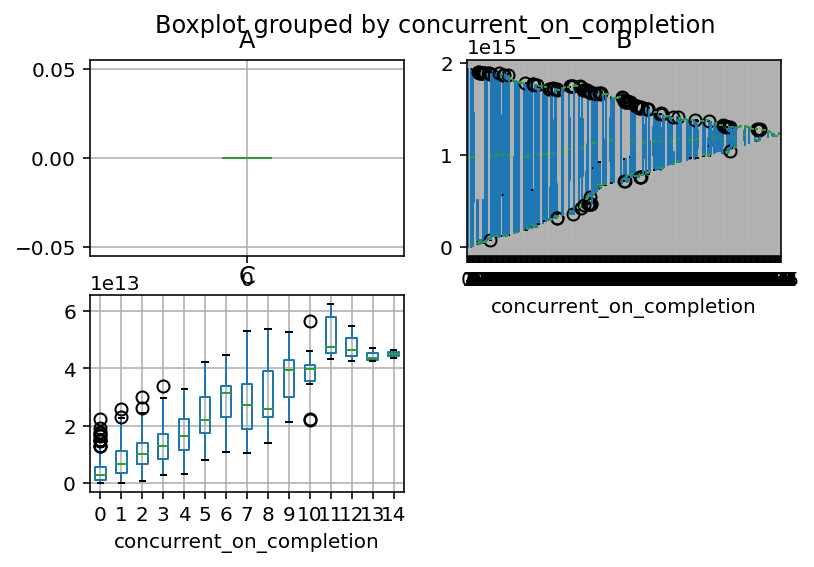

In [41]:
extra.groupby('activity').boxplot(column='total', by='concurrent_on_completion', sharey=False)

In [42]:
def ecdf(series):
    counts, edges = np.histogram(series, bins='auto', density=True)
    cum_probs = np.insert(np.cumsum(counts * np.diff(edges)), 0, 0)
    return edges, cum_probs

In [43]:
def sample_empirical(edges, cum_probs, n, return_r=False):
    r = np.random.random((1, n))
    argmax = np.argmax(r <= cum_probs[:, np.newaxis], axis=0)
    height = cum_probs[argmax] - cum_probs[argmax - 1]
    width = edges[argmax] - edges[argmax - 1]
    lower_sample_weight = (cum_probs[argmax] - r) / height
    upper_sample_weight = (r - cum_probs[argmax - 1]) / height
    res = lower_sample_weight * edges[argmax - 1] + upper_sample_weight * edges[argmax]
    # res == edges[argmax - 1] + width * (r - cum_counts[argmax - 1]) / height
    return (np.squeeze(r), np.squeeze(res)) if return_r else np.squeeze(res)

In [44]:
data = np.random.normal(1000, 10, 1000)

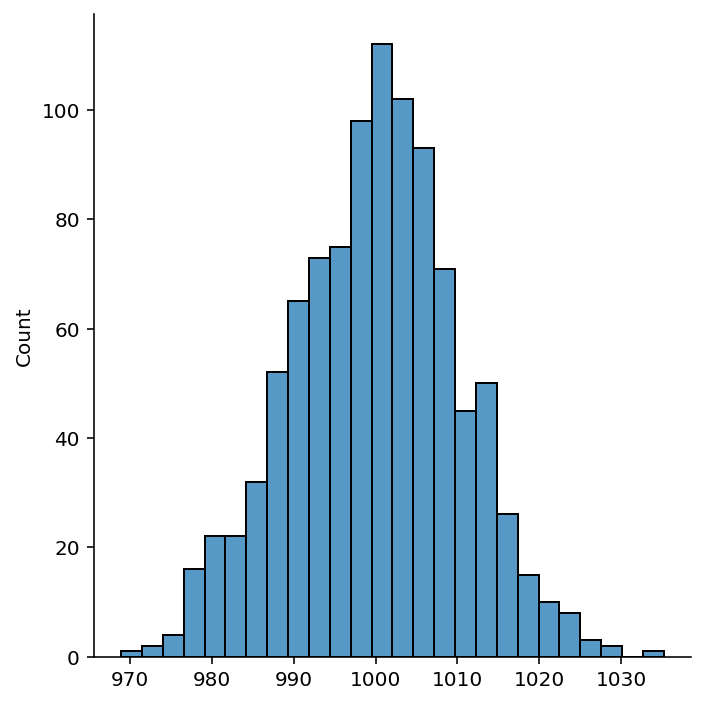

In [40]:
sns.displot(data)

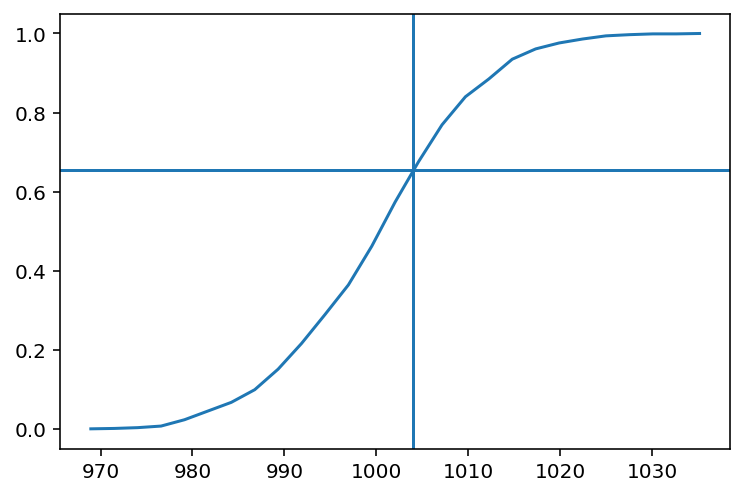

In [41]:
edges, cum = ecdf(data)
y, x = sample_empirical(edges, cum, 1, return_r=True)
plt.plot(edges, cum)
plt.axvline(x=x)
plt.axhline(y=y)

In [42]:
r, sample = sample_empirical(edges, cum, 1000, return_r=True)

In [43]:
print(scipy.stats.wasserstein_distance(data, sample))
print(pyemd.emd_samples(data, sample))
print(weird_emd(data, sample))
sns.displot([data, sample])

0.37171256203221625
0.3891693077660493


NameError: name 'weird_emd' is not defined

In [ ]:
def empirical_p(data1, data2):
    edf1 = ecdf(data1)
    edf2 = ecdf(data2)

    sample_size = 1000
    trials = 100
    test_statistics = []
    test_statistics1 = []
    test_statistics2 = []
    for i in range(trials):
        s1 = sample_empirical(*edf1, sample_size)
        s2 = sample_empirical(*edf2, sample_size)
        ci1 = np.quantile(s1, [0.05, 0.95])
        ci2 = np.quantile(s2, [0.05, 0.95])
        k1 = np.sum((s1 < ci2[0]) | (s1 > ci2[1])) / sample_size
        k2 = np.sum((s2 < ci1[0]) | (s2 > ci1[1])) / sample_size
        test_statistics.append((k1, k2, np.mean(s1) - np.mean(s2)))
        test_statistics1.append((np.mean(s1), np.median(s1)))
        test_statistics2.append((np.mean(s2), np.median(s2)))

    test_statistics = np.array(test_statistics)
    test_statistics1 = np.array(test_statistics1)
    test_statistics2 = np.array(test_statistics2)

    sns.displot([test_statistics[:, -1], test_statistics[:, -1]])

    print(np.sum(test_statistics, axis=0) / trials)
    p = np.sum(test_statistics1 < test_statistics2, axis=0) / trials
    print(p)


In [ ]:
empirical_p(data, data)

In [ ]:
sns.histplot([s1, s2], bins='auto', cumulative=False, stat='probability')

In [ ]:
empirical_p(s1, s2)

In [ ]:
sns.displot(x=df1['total'].dt.total_seconds(), hue=df1['activity'])

In [ ]:
sns.displot(x=df2['total'].dt.total_seconds(), hue=df2['activity'])

In [ ]:
for a in ['A', 'B', 'C']:
    print(df1.loc[df1['activity'] == a, 'total'].dt.total_seconds().mean())
    print(df2.loc[df2['activity'] == a, 'total'].dt.total_seconds().mean())
    empirical_p(df1.loc[df1['activity'] == a, 'total'].dt.total_seconds(),
                df2.loc[df2['activity'] == a, 'total'].dt.total_seconds())

In [ ]:
activities = sorted(list(set(df1['activity']).intersection(df2['activity'])))

groupby1 = df1.groupby('activity')
groupby2 = df2.groupby('activity')
for a in activities:
    total_waits1 = df1.loc[groupby1.groups[a], 'total'].dt.total_seconds()
    total_waits2 = df2.loc[groupby2.groups[a], 'total'].dt.total_seconds()

    sns.histplot([total_waits1, total_waits2], cumulative=True)
    plt.show()

    value_range = max(max(total_waits1), max(total_waits2)) - min(min(total_waits1), min(total_waits2))

    bin_edges = np.histogram_bin_edges([total_waits1, total_waits2], bins='auto')
    bin_range = np.max(bin_edges) - np.min(bin_edges)
    histogram_1 = np.histogram(total_waits1, bin_edges, density=False)
    histogram_2 = np.histogram(total_waits2, bin_edges, density=False)
    left_edges = bin_edges[:-1]
    widths = np.diff(bin_edges)
    plt.bar(left_edges, histogram_1[0], width=widths, label='log1')
    plt.bar(left_edges, histogram_2[0], width=widths, label='log2')
    plt.legend()
    plt.title(f'Histogram of total sojourn durations for activity {a}')
    plt.show()


    def normalized_distance(values):
        l = len(values)
        value_range = np.ptp(values)
        ret = np.tile(values.reshape((-1, 1)), (1, l)) - np.tile(values.reshape((1, -1)), (l, 1))
        return np.abs(ret) / value_range


    dist = []
    length = len(histogram_1[0])
    if length > 1:
        print(value_range)
        print(scipy.stats.wasserstein_distance(total_waits1, total_waits2))
        print(pyemd.emd_samples(total_waits1, total_waits2, extra_mass_penalty=value_range))
        print(
            pyemd.emd_samples(total_waits1, total_waits2, extra_mass_penalty=value_range, distance=normalized_distance))

        print(scipy.stats.wilcoxon(total_waits1, total_waits2, alternative='two-sided'))
        print(scipy.stats.kruskal(total_waits1, total_waits2))
        for i in range(length):
            row = []
            for j in range(length):
                row.append(abs(i - j) / (length - 1))
            dist.append(row)

        print(pyemd.emd((histogram_1[0] / len(total_waits1)).astype(np.float64),
                        (histogram_2[0] / len(total_waits2)).astype(np.float64), np.array(dist)))